In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import linalg as la
import sys
import matplotlib.pyplot as plt
import seaborn as sas

In [2]:
data_folder = Path("dataset/experiment-ii/S1/Air_Mat/")

file_name = data_folder / "Matrix_Air_B1.txt"
df = pd.read_csv(file_name, sep=" ", header=None)
#df = pd.read_csv(file_name, sep="\t", header=None)
#la stessa posizione viene misurata 82 volte DC
#df.drop(columns=[2048], inplace = True) #tolgo colonna
#df.drop(0, inplace = True) #tolgo riga
#df.drop(1, inplace = True) #tolgo riga
#df.drop(2, inplace = True) #tolgo riga

df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,44,44,50,47,47,49,47,47,48,50,...,43,44,41,44,47,44,44,43,42,44
1,46,41,48,52,58,62,57,54,60,58,...,42,44,44,43,43,45,43,45,44,42
2,44,44,50,47,52,61,55,55,69,64,...,43,46,41,43,44,43,43,43,44,46
3,44,50,48,46,49,55,59,50,131,103,...,44,43,46,42,43,43,42,44,42,43
4,52,65,75,73,79,386,487,102,603,393,...,45,44,47,43,44,45,44,45,46,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,208,223,177,177,218,245,268,230,198,166,...,49,51,46,46,45,42,45,49,46,52
60,123,122,112,108,125,129,152,143,120,95,...,51,45,49,45,45,44,44,42,46,61
61,62,76,79,76,74,81,89,86,72,65,...,48,44,47,46,44,44,41,44,50,52
62,108,141,122,135,132,146,139,132,108,87,...,68,48,50,48,47,44,44,45,47,52


In [61]:
array = df.to_numpy()
#avg = array.mean()
avg = np.mean(array, axis = 1, keepdims=True)

print(avg.shape)
array = array - avg

CX = np.cov(array)
w,v = la.eig(CX) 

CY =  np.diag(np.round(np.real(w),2))
print("Trace of the original data matrix: " , np.round(CX.trace(),2))
print("Trace of the data matrix after the changes of base: ", np.round(CY.trace(),2), "\n")

tr = 0;
for i in range(0,len(CY)):
    tr = tr + CY[i,i]
    print("Fraction of the total variability keeping only the first principal component: ", np.round(100*tr/CY.trace()),"%")


P = v[:,0:1]
print(P.shape)
P = abs(P)

array_final = P.T.dot(array)

(79, 1)
Trace of the original data matrix:  406009.65
Trace of the data matrix after the changes of base:  406009.68 

Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of

In [62]:
array_final[0] = array_final[0]
array_final[0][array_final[0] < 0] = 0
array_final[0][array_final[0] > 3000] = 1000

OldRange = array_final[0].max()  
NewRange = 1000 
for i in range(0,len(array_final[0])):
    array_final[0][i] = (((array_final[0][i]) * NewRange) / OldRange) 

file = open("prova1.txt", "w") 

for i in range(0,len(array_final[0])):
    l = i + 1;
    if(l%32 != 0):
        file.write(str(int(array_final[0][i])) + "\t") 
    else:
        file.write("\n") 
        
        
file.close() 

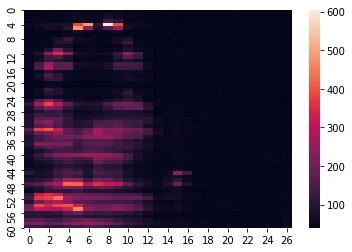

In [4]:
array = df.to_numpy()
sas.heatmap(array.reshape(64,27))

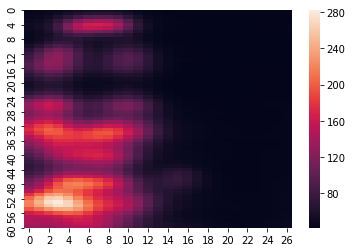

In [6]:
from scipy.ndimage import gaussian_filter

gauss = gaussian_filter(array, sigma=1.5)
#sas.heatmap(np.flip(gauss,0))
sas.heatmap(gauss.reshape(64,27))

In [80]:
tmp = array_final[0]

tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values of the shape of the body
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        if tmp[i][j] == 0:
            continue
        else:
            t.append(i)
            t.append(j)
            t.append(tmp[i][j])
            X.append(t)

X = np.array(X)


In [81]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [82]:
#center = [(6.5,15.5,500),(21.5,15.5,500),(38.,15.5,500),(55.,15.5,500)]
center = [(6.5,15.5,500),(21.5,15.5,500),(55.,15.5,500)]
center = np.array(center)
#km = km(n_clusters=4).fit(X_std)
km = km(n_clusters=3, init = center).fit(X_std)
km.labels_

y_km = km.predict(X_std)

o = km.cluster_centers_
print(o)
o = scaler.inverse_transform(o)
print(o)

[[-0.32809538  0.69957622  0.37446258]
 [ 1.47994061  0.04754917 -0.50271331]
 [-0.4641617  -0.97139807 -0.19659451]]
[[ 22.70833333  17.23863636 312.78996763]
 [ 46.9         13.775      119.42214781]
 [ 20.8877551    8.3622449  186.90408194]]


/home/giovanni/.local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


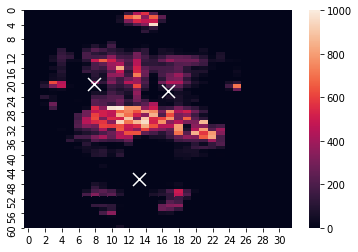

In [83]:
sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)



[[  1.          12.         147.35108959]
 [  1.          13.         438.81068005]
 [  1.          14.         560.0895641 ]
 [  1.          15.         215.49510272]]


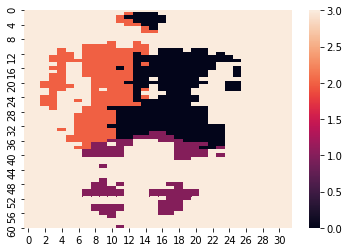

In [84]:
lol = [3 for i in range(64*32)]

for i in range(0,len(X)):
    index = int(X[i][0]*32) + int(X[i][1])
    lol[index] = km.labels_[i]

lol = np.array(lol)
sas.heatmap(lol.reshape(64,32))

print(X[0:4])

[[ 6.5 15.5]
 [21.5 15.5]
 [38.  15.5]
 [55.  15.5]]


/home/giovanni/.local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


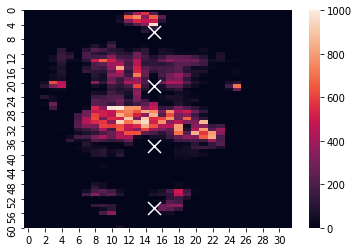

In [79]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler

tmp = array_final[0]
tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        t.append(i)
        t.append(j)
        X.append(t)

X = np.array(X)

center = [(0,0),(16,0),(37,0),(64,0)]
center = np.array(center)
#km = km(n_clusters=4).fit(X)
km = km(n_clusters=4, init = center).fit(X)
km.labels_

y_km = km.predict(X)

o = km.cluster_centers_
print(o)

sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


In [22]:
#data_folder = Path("dataset/experiment-ii/S1/Air_Mat/")

file_name = "dataset.csv"
df = pd.read_csv(file_name, sep=",", header=0)
df

,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.708622,1.430367,0.285714,0.037262,0.003015,0.000000,0.000000,0.000000,10,1.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,2.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,89.452321,33.894300,8.652494,1.490230,0.172477,0.010516,0.000000,0.000000,10,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.674124,69.541680,26.523572,6.793665,1.171713,0.135818,0.008257,0.000000,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,3.663386,10.769102,25.776653,44.820257,59.906891,66.967320,68.483350,68.186919,67.533618,66.473376,...,88.954667,104.805693,107.235015,92.311117,68.367649,44.101724,23.948157,12.149151,5,2.0
682,5.520406,16.565298,40.659388,72.857739,100.442987,115.059585,119.452088,120.986291,124.067379,128.730611,...,105.079988,96.889528,93.319434,89.233869,79.008347,59.259853,35.102578,18.545629,5,0.0
683,6.154273,18.037502,43.171575,75.580121,103.068848,119.933973,130.754334,141.586377,152.891839,159.918042,...,57.330410,56.904581,56.165159,54.346298,48.598867,36.694989,21.803688,11.529673,5,1.0
684,6.471592,19.598979,48.824700,89.602995,127.874748,152.905449,165.929064,174.297708,182.062296,187.079214,...,98.418701,98.206711,97.042717,92.953033,81.913084,61.247350,36.279455,19.203237,5,0.0


In [24]:
df.min(axis = 1)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
681    2.0
682    0.0
683    1.0
684    0.0
685    0.0
Length: 686, dtype: float64